### Relevant libraries

In [107]:
import re
from collections import defaultdict
import emoji
from statistics import mode
import matplotlib.pyplot as plt

### Data Loading and Preprocessing

In [108]:
def extract_date_and_time(line):
    # Define a regex pattern to match date and time at the beginning of the line
    pattern = r'^(\d{1,2}\.\d{1,2}\.\d{4}), (\d{1,2}:\d{2}) -'
    
    match = re.match(pattern, line)
    if match:
        date_str, time_str = match.groups()
        year = int(date_str.split('.')[2])
        hour = int(time_str.split(':')[0])
        return year, hour
    else:
        return None, None


def process_lines(file_path):
    user_lines = defaultdict(list)  # Dictionary to store user lines
    year_count = defaultdict(int)   # Dictionary to count occurrences by year
    hour_count = defaultdict(int)   # Dictionary to count occurrences by hour
    user_message_count = defaultdict(int)  # Dictionary to count messages per user
    user_media_count = defaultdict(int)  # Dictionary to count media per user
    user_emoji_count = defaultdict(int)  # Dictionary to count emojis per user
    user_emoji_use = defaultdict(list)  # Dictionary to count emojis per user
    general_emoji_count = defaultdict(int)  # Dictionary to count emojis in general
    
    with open(file_path, encoding="utf8") as file:
        last_user = None  # Initialize variable to track the last detected user
        for line in file:
            year, hour = extract_date_and_time(line)
            if year is not None and hour is not None:
                # Extract user name (between "-" and ":")
                user_match = re.search(r'-(.*?):', line)
                if user_match:
                    user = user_match.group(1).strip()
                    user_message_count[user] += 1   # Update message count
                    year_count[year] += 1           # Update year count
                    hour_count[hour] += 1           # Update hour count
                    rest_of_line = line[user_match.end():].split()
                    if "<המדיה לא נכללה>" not in line:
                        for token in rest_of_line:
                        # Count words and emojis
                            if token in emoji.EMOJI_DATA:   # problem: ignore emoji the attached to a word (not recogized as a emoji) 
                                user_emoji_count[user] += 1
                                user_emoji_use[user].append(token)
                                general_emoji_count[token] += 1
                            else:
                                user_lines[user].append(token)  # Its not emoji but a regular word
                    elif "<המדיה לא נכללה>" in line:
                        user_media_count[user] += 1
                    last_user = user  # Update the last detected user
                    
            elif last_user:
                # Line doesn't start with date and time; add it to the last user's lines
                if "<המדיה לא נכללה>" not in line:
                    for word in line.split():
                        user_lines[last_user].append(word)
                    

    return dict(user_lines), dict(year_count), dict(hour_count),dict(user_message_count), dict(user_media_count), dict(user_emoji_count), dict(user_emoji_use), dict(general_emoji_count)


## Run and print results

In [109]:
YOUR_FILE = 'file.txt' # put the file path


user_lines_dict, year_count_dict, hour_count_dict, message_count_dict, media_count_dict, emoji_count_dict, emoji_use_dict, general_emoji_count = process_lines(YOUR_FILE)

"""
# Print the user lines dictionary (print the text per user)
print("User lines:")
for user, lines in user_lines_dict.items():
    print(f"{user}: {lines}")
    most_used_word = mode(lines)
    print(f"Most used word: {most_used_word}")
"""

# Print the year count dictionary
print("\nYear count:")
for year, count in sorted(year_count_dict.items()):
    print(f"Year {year}: {count} occurrences")

# Print the hour count dictionary
print("\nHour count:")
for hour, count in sorted(hour_count_dict.items()):
    print(f"Hour {hour}: {count} occurrences")

# Print the massage count dictionary
print("\nMassage count:")
for user, message_count in sorted(message_count_dict.items()):
    print(f"{user}: {message_count} messages")

# Print word count and most used word for each user
print("\nWord count and most used word:")
for user, lines in user_lines_dict.items():
    print(f"{user}: {len(lines)} words")
    most_used_word = mode(lines)
    print(f"Most used word: {most_used_word}")

# Print the massage count dictionary
print("\nMedia count:")
for user, media_count in sorted(media_count_dict.items()):
    print(f"{user}: {media_count} media items")

# Print emoji count and most used emoji for each user
print("\nEmoji count and most used emoji:")
for user, emoji_count in emoji_count_dict.items():
    print(f"{user}: {emoji_count} emojis")
    most_used_emoji = mode(emoji_use_dict[user])
    print(f"Most used emoji: {most_used_emoji}")

print(f"\ngeneraly used emoji: {general_emoji_count}")



Year count:
Year 2015: 100 occurrences
Year 2016: 2543 occurrences
Year 2017: 2783 occurrences
Year 2018: 3509 occurrences
Year 2019: 3912 occurrences
Year 2020: 4635 occurrences
Year 2021: 3242 occurrences
Year 2022: 2827 occurrences
Year 2023: 3498 occurrences
Year 2024: 1115 occurrences

Hour count:
Hour 0: 155 occurrences
Hour 1: 164 occurrences
Hour 2: 53 occurrences
Hour 3: 12 occurrences
Hour 4: 7 occurrences
Hour 5: 61 occurrences
Hour 6: 240 occurrences
Hour 7: 791 occurrences
Hour 8: 1354 occurrences
Hour 9: 1550 occurrences
Hour 10: 1713 occurrences
Hour 11: 1908 occurrences
Hour 12: 1582 occurrences
Hour 13: 1633 occurrences
Hour 14: 1768 occurrences
Hour 15: 1911 occurrences
Hour 16: 2167 occurrences
Hour 17: 2163 occurrences
Hour 18: 2000 occurrences
Hour 19: 2068 occurrences
Hour 20: 1739 occurrences
Hour 21: 1562 occurrences
Hour 22: 1019 occurrences
Hour 23: 544 occurrences

Massage count:
harelhanuka: 2705 messages
אבא: 2397 messages
אוריאל: 1904 messages
אליה חנה: 3

### Visualization Functions


In [110]:
def create_chart_int(char): #for where the key is int
    # char: a tuple contain (data dictionary, name of x axis, chart title)
    data, x_axis, title = char
    # Extract keys and values
    keys = list(data.keys())
    values = list(data.values())

    # Create the bar chart
    plt.bar(keys, values)
    plt.xlabel(x_axis)
    plt.ylabel("Count")
    plt.title(title)

    # Show the chart
    plt.show()

def create_chart_name(char): #for where the key is str
    # char: a tuple contain (data dictionary, name of x axis, chart title)
    data, x_axis, title = char
    # Extract keys and values
    keys = list(data.keys())
    values = list(data.values())
    
    # Create the bar chart
    plt.bar(keys, values)
    plt.xlabel(x_axis)
    plt.ylabel("Count")
    plt.title(title)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=80)  # Adjust the rotation angle as needed
    
    # Show the chart
    plt.show()


## run and print charts

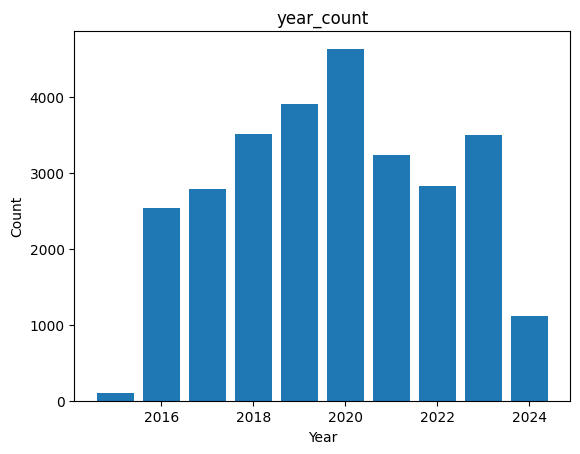

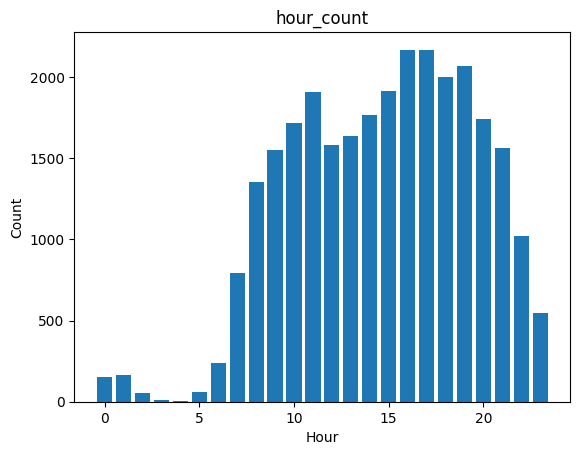

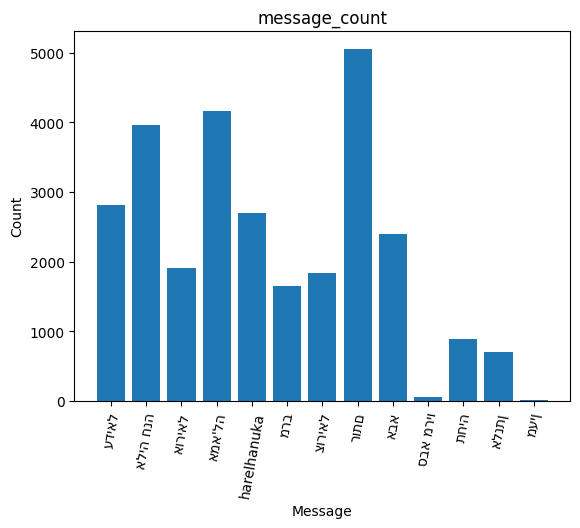

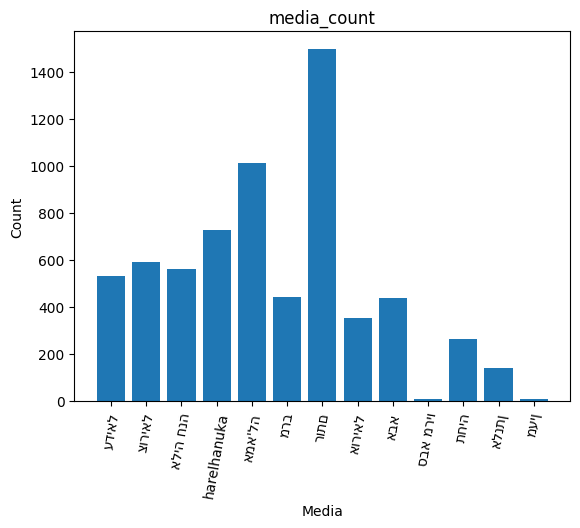

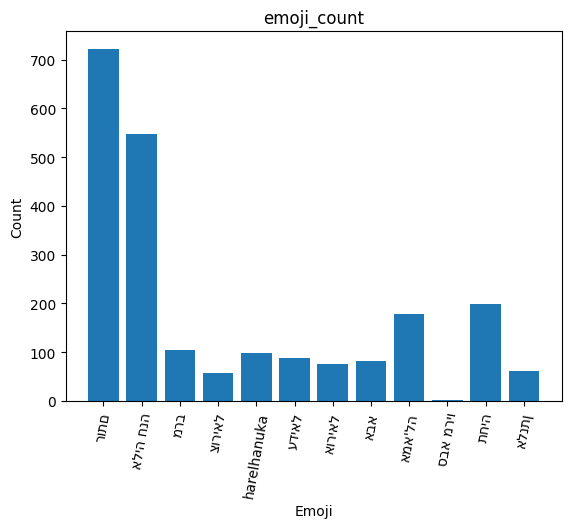

In [111]:
dict_list_int = [(year_count_dict, "Year", "year_count"),
            (hour_count_dict, "Hour", "hour_count")]

dict_list_name = [(message_count_dict, "Message", "message_count"),
            (media_count_dict, "Media", "media_count"),
            (emoji_count_dict, "Emoji", "emoji_count")]

for data in dict_list_int:
    create_chart_int(data)

for data in dict_list_name:
    create_chart_name(data)